In [ ]:
"""
Purpose: To put the whole axon classificatoin steps 
together into one function that will labels
branches as axon-like, axon and error

"""

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from os import sys
sys.path.append("/meshAfterParty/")

In [3]:
from importlib import reload

import neuron_utils as nru

import neuron

import neuron_visualizations as nviz

import time

import datajoint_utils as du

import numpy as np

import proofreading_utils as pru

import preprocessing_vp2 as pre

# -- For the axon classification --

import neuron_searching as ns

import skeleton_utils as sk

import numpy_utils as nu

import networkx_utils as xu

INFO - 2021-01-18 07:41:56,848 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-01-18 07:41:56,849 - settings - Setting database.user to celiib
INFO - 2021-01-18 07:41:56,849 - settings - Setting database.password to newceliipass
INFO - 2021-01-18 07:41:56,851 - settings - Setting stores to {'minnie65': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65', 'stage': '/mnt/dj-stor01/platinum/minnie65'}, 'meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/meshes'}, 'decimated_meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes'}, 'skeletons': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/skeletons'}}
INFO - 2021-01-18 07:41:56,852 - settings - Setting enable_python_native_blobs to True
INFO - 2021-01-18 07:41:56,866 - connection - Connect

Connecting celiib@at-database.ad.bcm.edu:3306


INFO - 2021-01-18 07:41:57,252 - settings - Setting enable_python_native_blobs to True


# Importing Neuron

In [99]:
neuron_obj_file = "classic_double_neuron_2"

In [100]:
curr_neuron_obj = nru.decompress_neuron(neuron_obj_file,neuron_obj_file)

Decompressing Neuron in minimal output mode...please wait


# Getting another neuron from database

In [32]:
minnie,_ = du.configure_minnie_vm()

In [45]:
import test_neurons as tn
segment_id = tn.big_run_long_axon[0]
segment_id

864691137196923969

In [120]:
seg_ids_to_test = (minnie.Decomposition() & "n_limbs > 5" & "n_error_limbs = 0").fetch("segment_id")
seg_ids_to_test

array([864691134800773453, 864691134835275642, 864691134879633410, ...,
       864691135718463537, 864691135718467377, 864691135718469681])

In [179]:
segment_id = 864691134884745466 #worked for this one
#segment_id = 864691134884742906 #worked
segment_id = 864691134884744698
segment_id = 864691134884741370
segment_id = seg_ids_to_test[-3000]
segment_id

864691135578531524

In [180]:
curr_neuron_obj = (minnie.Decomposition() & dict(segment_id=segment_id)).fetch1("decomposition")

Decompressing Neuron in minimal output mode...please wait


In [181]:
nviz.visualize_neuron(curr_neuron_obj,
                     visualize_type=["mesh","skeleton"],
                     limb_branch_dict="all")


 Working on visualization type: mesh

 Working on visualization type: skeleton


In [182]:
ret_col = nviz.visualize_neuron(curr_neuron_obj,
                     visualize_type=["mesh"],
                     limb_branch_dict="all",
                     mesh_resolution="limb",
                                return_color_dict=True)




 Working on visualization type: mesh


In [183]:
# ret_col = nviz.visualize_neuron(curr_neuron_obj,
#                      visualize_type=["mesh","skeleton"],
#                      limb_branch_dict=dict(L1="all"),
#                                return_color_dict=True)

In [184]:
# nviz.plot_limb_concept_network_2D(curr_neuron_obj,
#                                  node_colors=ret_col)

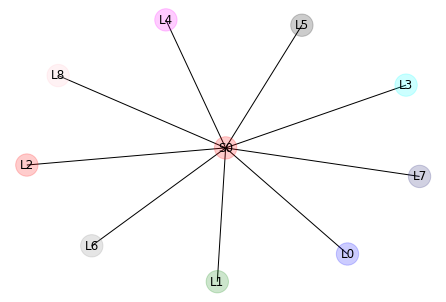

In [185]:
nviz.plot_soma_limb_concept_network(curr_neuron_obj,
                                   node_colors=ret_col)

# Running the Axon Classification

In [186]:
import classification_utils as clu

axon_limb_branch_dict,error_limb_branch_dict = clu.axon_classification(curr_neuron_obj,
                   verbose=True,
                    plot_axons=True,
                   plot_axon_errors=True,
                    error_width_max=200)

current_query = (n_spines < 4 and (median_mesh_center < 600) and skeleton_distance_branch <= 25000) or (skeleton_distance_branch > 15000 and (median_mesh_center < 600) and spines_per_skeletal_length < 0.00007)
functions_list = [<function width at 0x7f98d7823400>, <function median_mesh_center at 0x7f98d78230d0>, <function n_spines at 0x7f98d78231e0>, <function n_faces_branch at 0x7f98d5d28ae8>, <function skeleton_distance_branch at 0x7f98d7823048>, <function spines_per_skeletal_length at 0x7f98d78237b8>, <function no_spine_median_mesh_center at 0x7f98d7823488>]
functions_list = [<function axon_segment at 0x7f98d787a1e0>]

Part 1: Axon like branchese 
{'L1': array([ 1,  2,  3,  4,  6,  7,  8,  9, 10, 11, 25]), 'L2': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 28, 29, 30, 31, 32, 33, 34,
       35, 39, 41]), 'L4': array([3, 5, 7]), 'L6': array([ 3,  5,  6,  7,  8,  9, 11]), 'L8': array([0])}
functions_list = [<f

functions_list = [<function labels_restriction at 0x7f98d7823730>, <function median_mesh_center at 0x7f98d78230d0>]

 Working on visualization type: mesh



 Working on visualization type: mesh


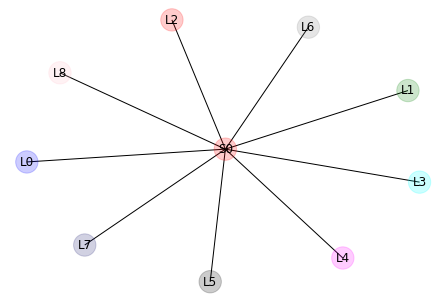

In [187]:
ret_col = nviz.visualize_neuron(curr_neuron_obj,
                     visualize_type=["mesh"],
                     limb_branch_dict="all",
                     mesh_resolution="limb",
                                return_color_dict=True)

nviz.plot_soma_limb_concept_network(curr_neuron_obj,
                                   node_colors=ret_col)

In [189]:
ret_col = nviz.visualize_neuron(curr_neuron_obj,
                                visualize_type=["mesh","skeleton"],
                     limb_branch_dict=dict(L1="all"),
                               return_color_dict=True)


 Working on visualization type: mesh

 Working on visualization type: skeleton


No limb name was given so using L1 because was the limb in the first key


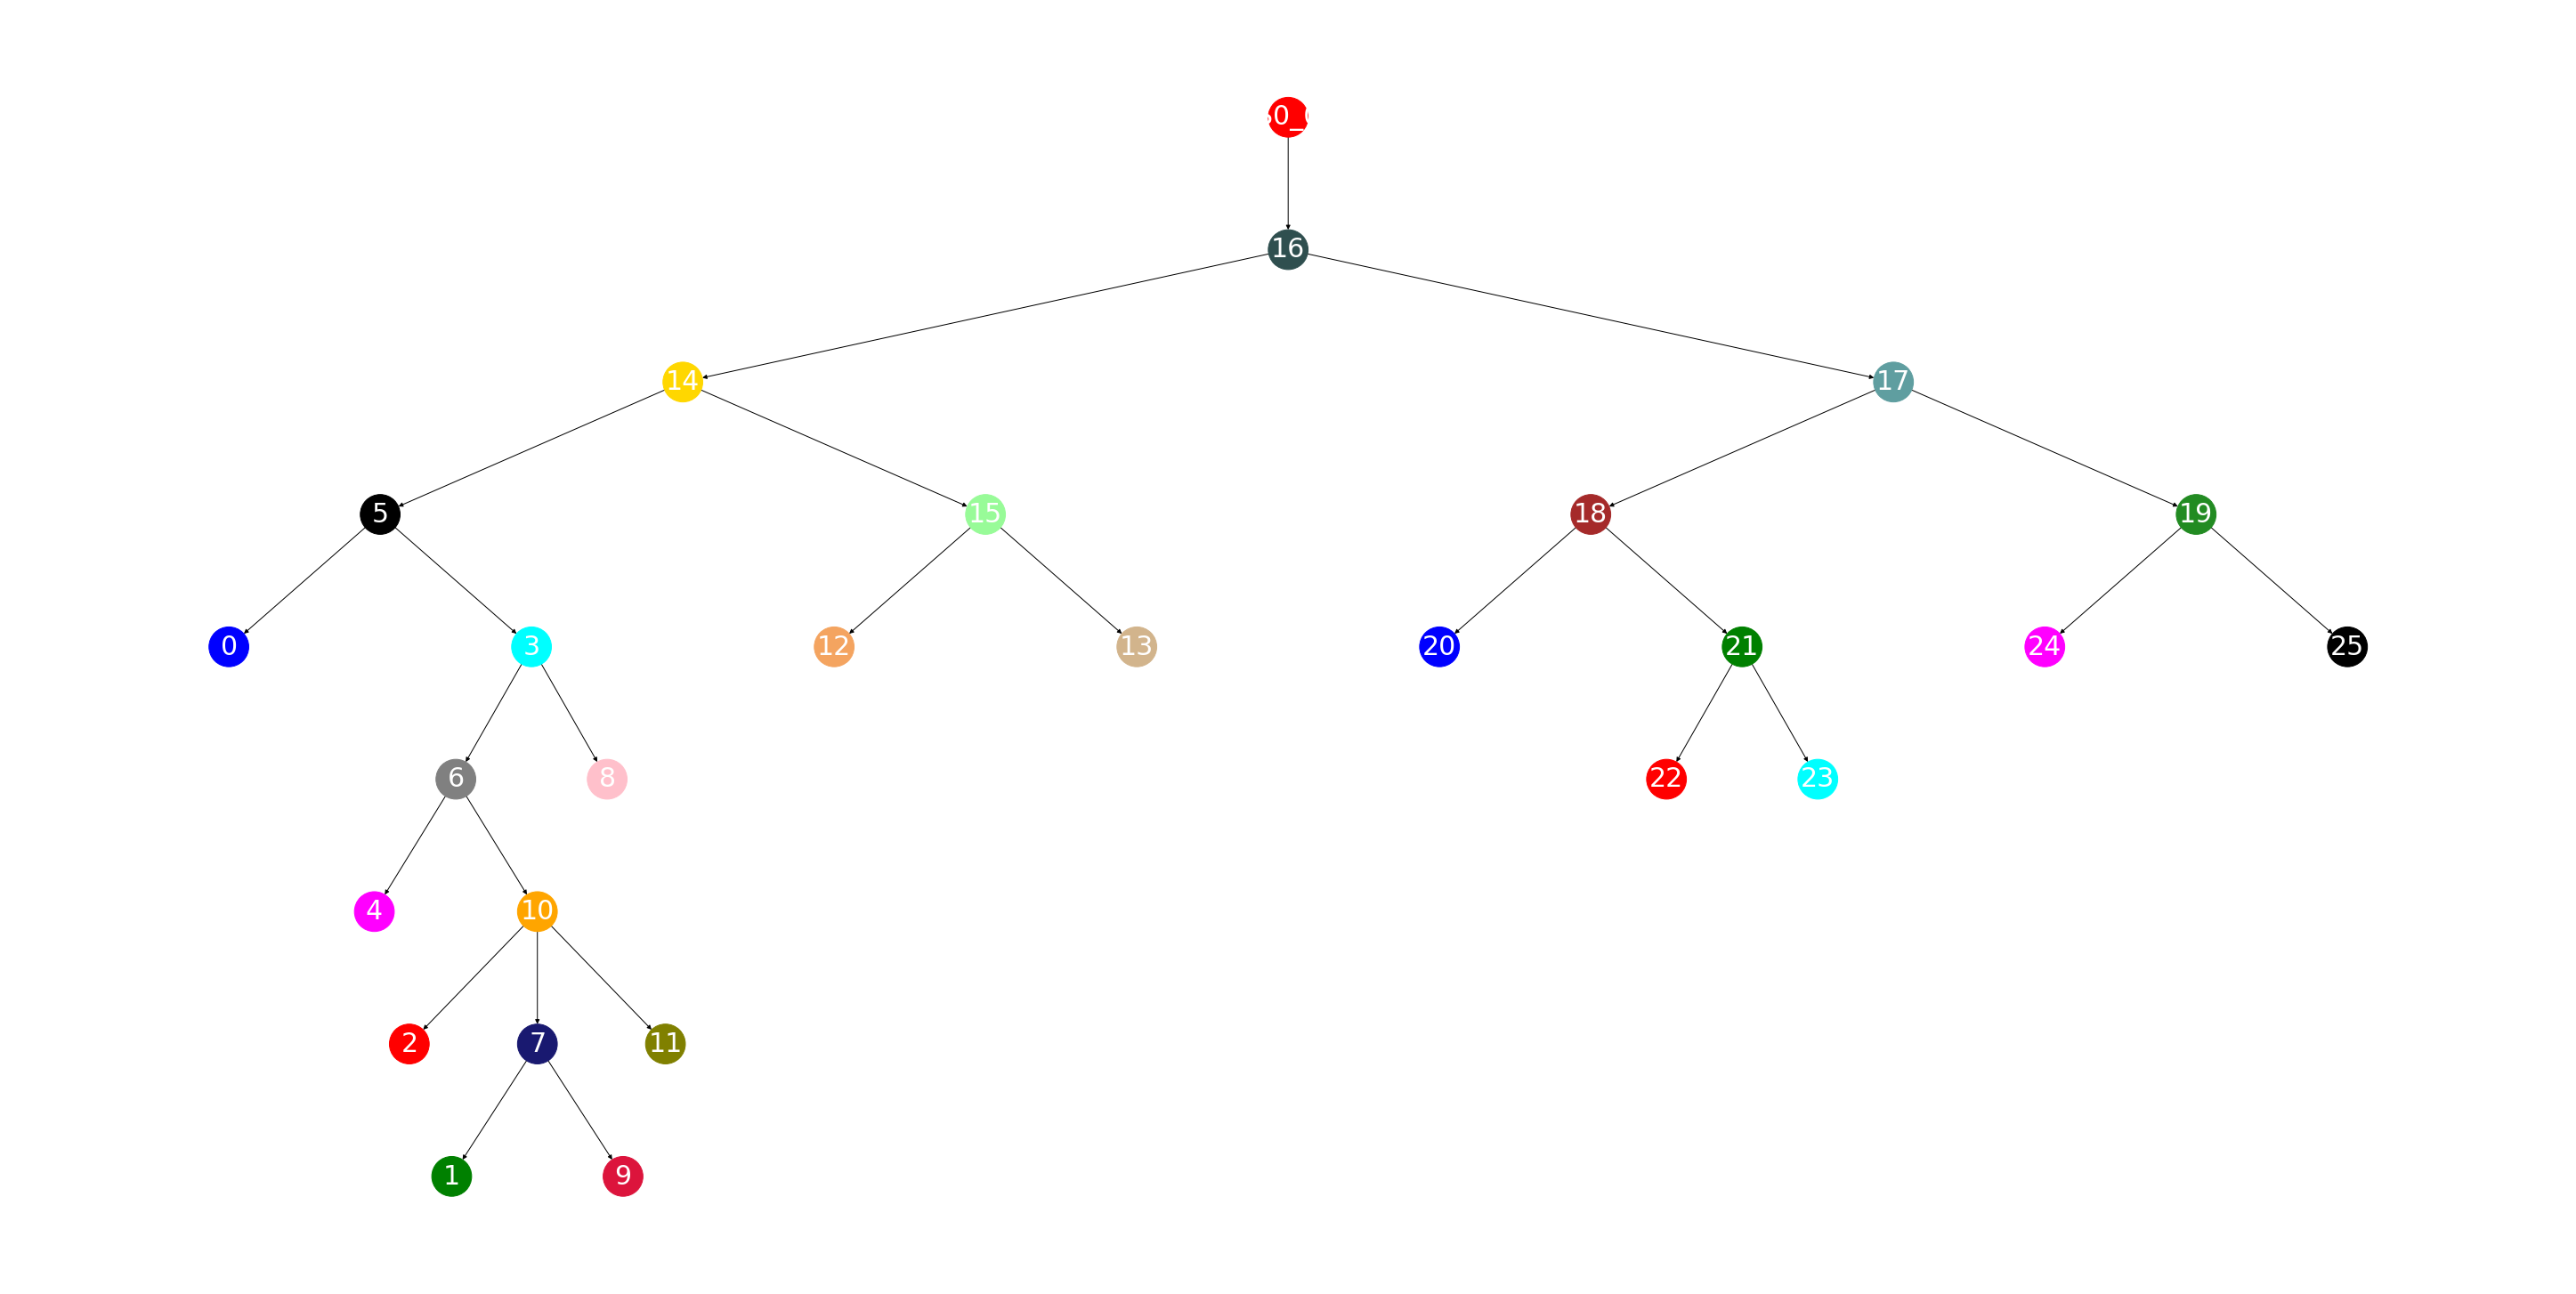

In [190]:
nviz.plot_limb_concept_network_2D(curr_neuron_obj,
                                   node_colors=ret_col)

In [191]:
ex_branch = curr_neuron_obj[1][25]

In [192]:
ex_branch.width_new

{'median_mesh_center': 134.24769837942708,
 'no_spine_median_mesh_center': 134.24769837942708}

In [193]:
ex_branch.n_spines

0

In [149]:
sk.calculate_skeleton_distance(ex_branch.skeleton)

18087.053330393166

In [150]:
import skeleton_utils as sk
len(ex_branch.spines)/sk.calculate_skeleton_distance(ex_branch.skeleton)

0.0

In [142]:
3/15000

0.0002

In [140]:
nviz.plot_objects(ex_branch.mesh,
                 meshes=ex_branch.spines,
                 meshes_colors="red")